<a href="https://colab.research.google.com/github/deveshnew12/insurance_data_analysis/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("insurance (1).csv")
ins=pd.DataFrame(df)
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
ins.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   bool 
 1   sex       1338 non-null   bool 
 2   bmi       1338 non-null   bool 
 3   children  1338 non-null   bool 
 4   smoker    1338 non-null   bool 
 5   region    1338 non-null   bool 
 6   charges   1338 non-null   bool 
dtypes: bool(7)
memory usage: 9.3 KB


no null value found

In [4]:
ins.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


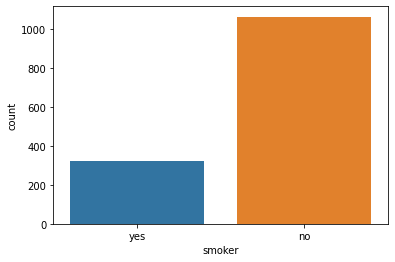

In [5]:
sns.countplot(x="region",data=ins)
sns.countplot(x="smoker",data=ins)

In [6]:
ins[["age","region","bmi","smoker"]].groupby(["region","age","smoker"]).count()

bmi
region    age smoker     
northeast 18  no       25
              yes       7
          20  no        5
              yes       1
          21  no        6
...                   ...
southwest 62  no        5
          63  no        4
              yes       2
          64  no        3
              yes       2

[329 rows x 1 columns]

In [8]:
ins['charges']<40000


0       True
1       True
2       True
3       True
4       True
        ... 
1333    True
1334    True
1335    True
1336    True
1337    True
Name: charges, Length: 1338, dtype: bool

In [14]:
nosmoker=df.loc[df['smoker'] =="no"]
nosmoker

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


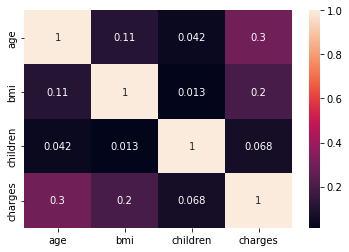

In [9]:
sns.heatmap(ins.corr(),annot=True)


In [10]:
ins[["smoker",]]

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


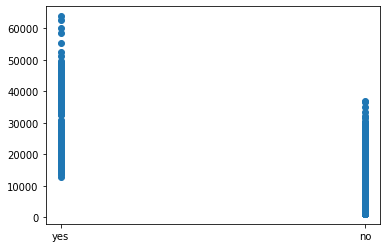

In [7]:
plt.scatter(x="smoker",y="charges",data=ins)

none smoker has less charges then smoker

<BarContainer object of 1064 artists>

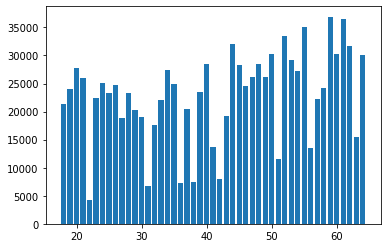

In [25]:
plt.bar(x="age",height="charges",data=nosmoker)

Charges of people ahead of 50 are more:

In [36]:
fig=px.histogram(df,y="age",x="charges",color="smoker",marginal="rug",hover_name="bmi")
fig.show()